# Лабораторная работа 5.  Эвристические алгоритмы

**Цель работы:** ознакомление с  эвристическими алгоритмами  и методикой оценки  их эффективности.

**Вариант:** 14

## Задание 1.

Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа.

а) Используя волновой алгоритм вручную построить оптимальный путь через лабиринт.

б) Используя маршрутный алгоритм вручную построить оптимальный путь через лабиринт.

| Вариант | Лабиринт | 
|:---|:---|
| 14  | ![](./img/maze05_14.png) |

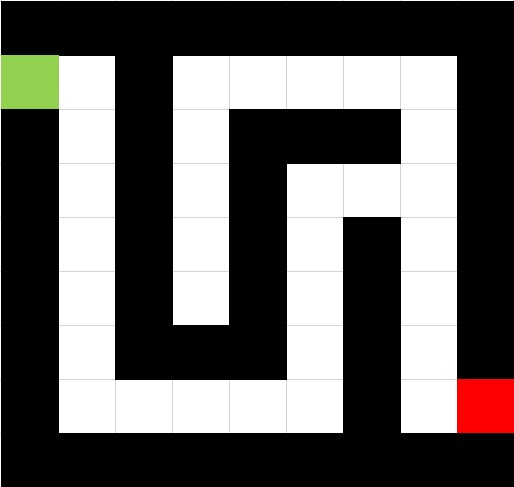

### Волновой алгоритм

Волновой фронт расходится только на 17 шаге. На картинке видно, что минимальный (оптимальный) путь составил 21 шаг (оптимальный путь выделен оранжевым цветом на картинке). 

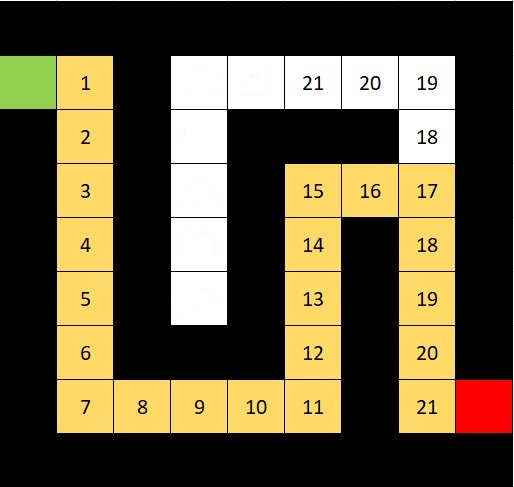

### Маршрутный алгоритм

Евклидово расстояние: $d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 }$ 

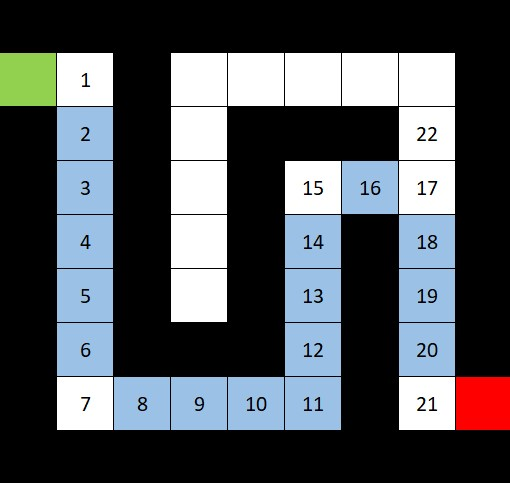

Рассмотрим начальную точку нашего маршрута (выделена зеленым цветом). Точки, окружащие нашу начальную, 1 и 2. Сравним расстояния от данных точек до конечной (выделена красным цветом). Будем использовать формулу Евклидова расстояния: $d = \sqrt{(x_n - x_k)^2 + (y_n - y_k)^2 }$. Координаты конца маршрута $x_k = 9$ и $y_k = 2$, координаты с индексом n - координаты рассматриваемой точки.

$d_1 = \sqrt{(2 - 9)^2 + (8 - 2)^2 } = \sqrt{49+36} = \sqrt{85}$

$d_2 = \sqrt{(2 - 9)^2 + (7 - 2)^2 } = \sqrt{49+25} = \sqrt{74}$

$d_2 < d_1$, поэтому передвигаемся от начальной точки к точке 2.

Далее рассматриваем точку 2. Окружающие ее точки 1 и 3: $d_3 = \sqrt{(2 - 9)^2 + (6 - 2)^2 } = \sqrt{49+16} = \sqrt{65}$. $d_3 < d_1$, поэтому передвигаемся к точке 3. По аналогии, движение происходит до точки 6.

Точки, окружающие точку 6, - это 5, 7 и 8. Расстояние $d_8$ будет наименьшим, поэтому с 6 мы двигаемся по диагонали до 8 точки.

По такому принципу мы получаем маршрут, окрашенный голубым цветом на картинке.

## Задание 2.

Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа. 
Реализовав алгоритм в соответствии с заданием построить оптимальный путь через лабиринт.

| Вариант | Лабиринт | Алгоритм |
|:---|:---|:---|
| 14  | ![](./img/maze10_14.png) | Марштутный алгоритм с манхэттенским расстоянием |

Манхэттенское расстояние:  $d = |x_2 - x_1| + |y_2 - y_1| $ 

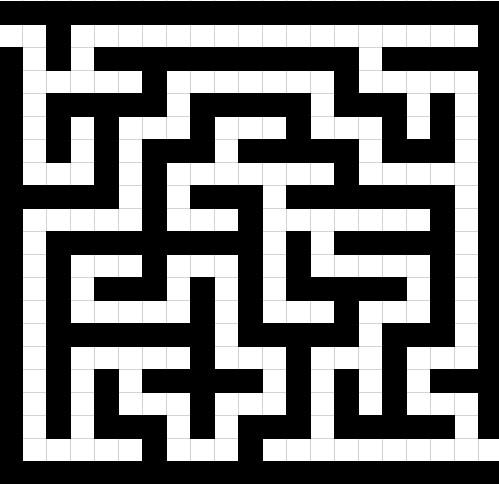

### Решение

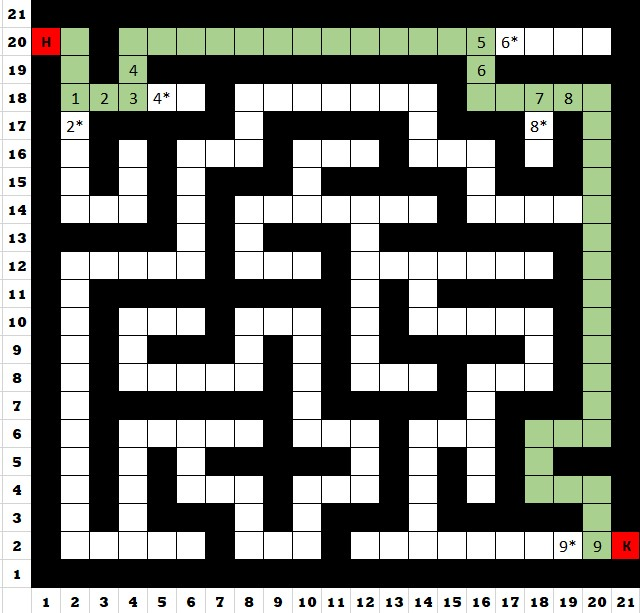

Движение от начальной точки до точки 1 очевидно. Далее идет разветвление на 2 и 2*. Сравним расстояния от этих точек до конечной с помощью формулы Манхэттенского расстояния (координаты конечной точки (21;2)):  $d = |x_n - 21| + |y_n - 2| $, где $x_n$ и $y_n$ - координаты рассматриваемой точки.

$d_{2} = |3 - 21| + |18 - 2| = 18 + 16 = 34 $

$d_{2^*} = |2 - 21| + |17 - 2| = 19 + 15 = 34 $

Расстояния получились одинаковыми. Однако можно заметить, что в напралении точки 2* при любом исходе будет тупик. Исходя из данной логики, мы выбираем точку 2. 

Следующее разветвление пути мы наблюдаем в точке 3. Сравним расстояния:

$d_{4} = |4 - 21| + |19 - 2| = 17 + 17 = 34 $

$d_{4^*} = |5 - 21| + |18 - 2| = 16 + 16 = 32 $

Расстояние $d_{4^*}$ оказалось меньше, но если мы пойдем в направлении 4*, при любом исходе будет тупик. Значит, выбираем точку 4. Далее идем до точки 5. Сравним расстояния 6 и 6*.

$d_{6} = |16 - 21| + |19 - 2| = 5 + 17 = 22 $

$d_{6^*} = |17 - 21| + |20 - 2| = 4 + 18 = 22 $

Опять наши расстояния равны. Исходя из вышеописанной логики, выбираем точку 6. Сравним расстояния 8 и 8*:

$d_{8} = |19 - 21| + |18 - 2| = 2 + 16 = 18 $

$d_{8^*} = |18 - 21| + |17 - 2| = 3 + 16 = 19 $

$d_{8^*} > d_{8} => $ выбираем точку 8. Дальнейший путь очевиден. Получившийся путь изображен на картинке зеленым цветом

### Создание гифки для визуализации

In [2]:
from PIL import Image, ImageDraw
images = []

a = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]
zoom = 20
borders = 6
start = 1,0
end = 19,20

def make_step(k):
  for i in range(len(m)):
    for j in range(len(m[i])):
      if m[i][j] == k:
        if i>0 and m[i-1][j] == 0 and a[i-1][j] == 0:
          m[i-1][j] = k + 1
        if j>0 and m[i][j-1] == 0 and a[i][j-1] == 0:
          m[i][j-1] = k + 1
        if i<len(m)-1 and m[i+1][j] == 0 and a[i+1][j] == 0:
          m[i+1][j] = k + 1
        if j<len(m[i])-1 and m[i][j+1] == 0 and a[i][j+1] == 0:
           m[i][j+1] = k + 1

def print_m(m):
    for i in range(len(m)):
        for j in range(len(m[i])):
            print( str(m[i][j]).ljust(2),end=' ')
        print()

def draw_matrix(a,m, the_path = []):
    im = Image.new('RGB', (zoom * len(a[0]), zoom * len(a)), (255, 255, 255))
    draw = ImageDraw.Draw(im)
    for i in range(len(a)):
        for j in range(len(a[i])):
            color = (255, 255, 255)
            r = 0
            if a[i][j] == 1:
                color = (0, 0, 0)
            if i == start[0] and j == start[1]:
                color = (0, 255, 0)
                r = borders
            if i == end[0] and j == end[1]:
                color = (0, 255, 0)
                r = borders
            draw.rectangle((j*zoom+r, i*zoom+r, j*zoom+zoom-r-1, i*zoom+zoom-r-1), fill=color)
            if m[i][j] > 0:
                r = borders
                draw.ellipse((j * zoom + r, i * zoom + r, j * zoom + zoom - r - 1, i * zoom + zoom - r - 1),
                               fill=(255,0,0))
    for u in range(len(the_path)-1):
        y = the_path[u][0]*zoom + int(zoom/2)
        x = the_path[u][1]*zoom + int(zoom/2)
        y1 = the_path[u+1][0]*zoom + int(zoom/2)
        x1 = the_path[u+1][1]*zoom + int(zoom/2)
        draw.line((x,y,x1,y1), fill=(255, 0,0), width=5)
    draw.rectangle((0, 0, zoom * len(a[0]), zoom * len(a)), outline=(0,255,0), width=2)
    images.append(im)


m = []
for i in range(len(a)):
    m.append([])
    for j in range(len(a[i])):
        m[-1].append(0)
i,j = start
m[i][j] = 1

k = 0
while m[end[0]][end[1]] == 0:
    k += 1
    make_step(k)
    draw_matrix(a, m)


i, j = end
k = m[i][j]
the_path = [(i,j)]
while k > 1:
  if i > 0 and m[i - 1][j] == k-1:
    i, j = i-1, j
    the_path.append((i, j))
    k-=1
  elif j > 0 and m[i][j - 1] == k-1:
    i, j = i, j-1
    the_path.append((i, j))
    k-=1
  elif i < len(m) - 1 and m[i + 1][j] == k-1:
    i, j = i+1, j
    the_path.append((i, j))
    k-=1
  elif j < len(m[i]) - 1 and m[i][j + 1] == k-1:
    i, j = i, j+1
    the_path.append((i, j))
    k -= 1
  draw_matrix(a, m, the_path)

for i in range(10):
    if i % 2 == 0:
        draw_matrix(a, m, the_path)
    else:
        draw_matrix(a, m)

# print_m(m) # печатает мартицу
# print(the_path) # печатает путь по координатам


images[0].save('maze.gif',
               save_all=True, append_images=images[1:],
               optimize=False, duration=1, loop=0)

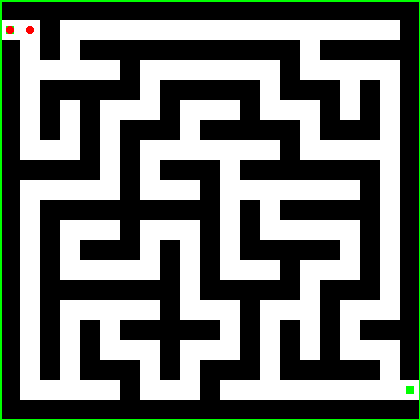